#### Preprocessing and Training Preparation
In this notebook, we will accomplish two main takes:
* Prepare our data to work with models by scaling it appropriately and normalizing it (if warranted)
* Clean our dataset to make sure there are no extraneous columns that we will not be using for analysis

The main purpose of this step is to setup or process well enough that we can confidently move to modeling without having to tweaks each time in preparation for a model.

In [1]:
# First, let's import the primary packages we need to import our data as is
import numpy as np
import pandas as pd

In [2]:
# Second, let's download our data set to begin working through preparing it
pd.set_option('max_columns', None)
df_raw = pd.read_csv('Placement_Data_Full_Class_CLEANED.csv')
df_raw.head()

,Unnamed: 0,sl_no,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation,specialisation_finance,specialisation_hr,mba_p,employed,salary,salary_gt0_outliers
0,0,1,0,67.00,0,91.00,0,0,Commerce,1,0,58.00,0,Sci&Tech,0,1,0,55.0,Mkt&HR,0,1,58.80,1,270000.0,0
1,1,2,0,79.33,1,78.33,0,0,Science,0,1,77.48,0,Sci&Tech,0,1,1,86.5,Mkt&Fin,1,0,66.28,1,200000.0,0
2,2,3,0,65.00,1,68.00,0,1,Arts,0,0,64.00,0,Comm&Mgmt,1,0,0,75.0,Mkt&Fin,1,0,57.80,1,250000.0,0
3,3,4,0,56.00,1,52.00,0,1,Science,0,1,52.00,0,Sci&Tech,0,1,0,66.0,Mkt&HR,0,1,59.43,0,0.0,0
4,4,5,0,85.80,1,73.60,0,1,Commerce,1,0,73.30,0,Comm&Mgmt,1,0,0,96.8,Mkt&Fin,1,0,55.50,1,425000.0,1


In [3]:
#Third, let's quickly get a list of the columns
df_raw.keys()

Index(['Unnamed: 0', 'sl_no', 'female', 'ssc_p', 'ssc_Central', 'hsc_p',
       'hsc_p_outlier', 'hsc_Central', 'hsc_s', 'hsc_s_commerce',
       'hsc_s_science', 'degree_p', 'degree_p_outlier', 'degree_t',
       'degree_t_comm_mgmt', 'degree_t_sci_tech', 'work_experience', 'etest_p',
       'specialisation', 'specialisation_finance', 'specialisation_hr',
       'mba_p', 'employed', 'salary', 'salary_gt0_outliers'],
      dtype='object')

#### Going over our columns one more time (part 1)
If we go over our columns one more time, we can quickly identify the ones that are worth dropping:
* Unnamed: 0: This is a repeat column that we can most likely drop
* sl_no: This acts as an index columb with base 1 which we can most likely drop
* female: This identifies if the observation is a female which we will keep
* ssc_p: Identifies secondary school percentile which we'll keep
* ssc_Central: Identifies if Central school which we'll keep
* hsc_p: Identifies high school percenetile which we'll keep
* hsc_p_outlier: Identifies if the hsc_p is an outlier which we'll keep for now
* hsc_Central: Identifies school as Central so we'll keep
* hsc_s: Strictly a category indicator which means we'll drop it
* hsc_s_commerce: Commerce specialization (treats base as Arts)
* hsc_s_science: Science specialization (treats base as Arts)
* degree_p: Degree percentage 
* degree_p_outlier: If Degree percentage is an outlier
* degree_t: Strictly category label so we'll properly drop it
* degree_t_comm_mgmt: Dummy variable for Comm
* degree_t_sci_tech: Dummy variable for Sci&Tech
* work_experience: Dummy variable for work experience
* etest_p: Test percentage
* specialisation: Strictly categorical label
* specialisation_finance: Dummy for Finance Specialization
* specialisation_hr: Dummy for HR Specialization
* mba_p: MBA percentage
* employed: Dummy variable for employed or not
* salary: Salary Amount
* salary_gt0_outliers: If Salary Amount is an outlier (excluding zeroes when doing IQR test)

Alright, so let's start cleaning up our database to make it more appropriate for running models

In [4]:
#First, let's drop the 'Unnamed: 0' & 'sl_no' columns as they provide no real benefit to us
df_processing = df_raw.drop(['Unnamed: 0','sl_no'],axis = 1)
df_processing.head()

,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation,specialisation_finance,specialisation_hr,mba_p,employed,salary,salary_gt0_outliers
0,0,67.00,0,91.00,0,0,Commerce,1,0,58.00,0,Sci&Tech,0,1,0,55.0,Mkt&HR,0,1,58.80,1,270000.0,0
1,0,79.33,1,78.33,0,0,Science,0,1,77.48,0,Sci&Tech,0,1,1,86.5,Mkt&Fin,1,0,66.28,1,200000.0,0
2,0,65.00,1,68.00,0,1,Arts,0,0,64.00,0,Comm&Mgmt,1,0,0,75.0,Mkt&Fin,1,0,57.80,1,250000.0,0
3,0,56.00,1,52.00,0,1,Science,0,1,52.00,0,Sci&Tech,0,1,0,66.0,Mkt&HR,0,1,59.43,0,0.0,0
4,0,85.80,1,73.60,0,1,Commerce,1,0,73.30,0,Comm&Mgmt,1,0,0,96.8,Mkt&Fin,1,0,55.50,1,425000.0,1


In [5]:
#Second, let's quickly check the purely categorical variables to verify what the 'base' value will be
print(df_processing['hsc_s'].unique())
print(df_processing['degree_t'].unique())
print(df_processing['specialisation'].unique())

['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['Mkt&HR' 'Mkt&Fin']


* We can see for the 'hsc_s' class of features, we have dummy variables for commerce and science which means 'Arts' will be the base category (which will not have a dummy variable)
* We can see for the 'degree_t' class of features, we have dummy variables for Comm and Sci so 'Other' will be the base category
* We can see for the 'specialisation' class of features, whe have HR and Fin, both of which have dummy variables. Therefore, we'll need to drop one to make it the base. We'll drop HR to make it the base.

In [6]:
#Third, let's drop the associated columns
df_processing = df_processing.drop(['hsc_s','degree_t','specialisation','specialisation_hr'],axis = 1)
df_processing.head()

,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation_finance,mba_p,employed,salary,salary_gt0_outliers
0,0,67.00,0,91.00,0,0,1,0,58.00,0,0,1,0,55.0,0,58.80,1,270000.0,0
1,0,79.33,1,78.33,0,0,0,1,77.48,0,0,1,1,86.5,1,66.28,1,200000.0,0
2,0,65.00,1,68.00,0,1,0,0,64.00,0,1,0,0,75.0,1,57.80,1,250000.0,0
3,0,56.00,1,52.00,0,1,0,1,52.00,0,0,1,0,66.0,0,59.43,0,0.0,0
4,0,85.80,1,73.60,0,1,1,0,73.30,0,1,0,0,96.8,1,55.50,1,425000.0,1


In [7]:
#Now, let's check the our data is currently
df_processing.describe()

,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation_finance,mba_p,employed,salary,salary_gt0_outliers
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,0.539535,66.333163,0.037209,0.390698,0.525581,0.423256,66.370186,0.004651,0.674419,0.274419,0.344186,72.100558,0.558140,62.278186,0.688372,198702.325581,0.069767
std,0.479168,10.827205,0.499598,10.897509,0.189716,0.489045,0.500510,0.495228,7.358743,0.068199,0.469685,0.447262,0.476211,13.275956,0.497767,5.833385,0.464240,154780.926716,0.255349
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000
50%,0.000000,67.000000,1.000000,65.000000,0.000000,0.000000,1.000000,0.000000,66.000000,0.000000,1.000000,0.000000,0.000000,71.000000,1.000000,62.000000,1.000000,240000.000000,0.000000
75%,1.000000,75.700000,1.000000,73.000000,0.000000,1.000000,1.000000,1.000000,72.000000,0.000000,1.000000,1.000000,1.000000,83.500000,1.000000,66.255000,1.000000,282500.000000,0.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,1.000000,1.000000,1.000000,91.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000,1.000000


We see a few things with our data:
* The dummy features are naturally scaled from 0 to 1 which means they are more or less fine for using in models
* Our XXX_p features (e.g., hsc_p) are not in decimal form which means they can probably be standardized to help make them more to scale with our dummy variables
* The 'salary' feature has _much_ higher values than the other features. However, there may not be a need to standardize it for two main reasons. First, since this is what we are trying to predict, we aren't naturally going to need to standardize it. Second, it won't even be used in the 'employed' test.

As such, it may make sense to now separate our data set into two groups: Everything except the salary info which will probably be well-suited for a MinMaxScaler and the salary info which will need some further evaluation

#### Creating the dataset

In [8]:
#Let's make a data set just for the non-salary stuff first.
df_processing_dataset = df_processing.drop(['salary'],axis=1)
df_processing_dataset.head()

,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation_finance,mba_p,employed,salary_gt0_outliers
0,0,67.00,0,91.00,0,0,1,0,58.00,0,0,1,0,55.0,0,58.80,1,0
1,0,79.33,1,78.33,0,0,0,1,77.48,0,0,1,1,86.5,1,66.28,1,0
2,0,65.00,1,68.00,0,1,0,0,64.00,0,1,0,0,75.0,1,57.80,1,0
3,0,56.00,1,52.00,0,1,0,1,52.00,0,0,1,0,66.0,0,59.43,0,0
4,0,85.80,1,73.60,0,1,1,0,73.30,0,1,0,0,96.8,1,55.50,1,1


In [9]:
#This dataset seems best to use a MinMaxScalar given that we have 
#primarily dummy features and features that are representative of percentages

#Let's import MinMaxScalar from SKLearn
from sklearn.preprocessing import MinMaxScaler

In [10]:
#We'll need to rebuild the data frame once we scale it so let's get a list of our keys that we can apply back
keyList = df_processing_dataset.columns.values.tolist()
print(keyList)

['female', 'ssc_p', 'ssc_Central', 'hsc_p', 'hsc_p_outlier', 'hsc_Central', 'hsc_s_commerce', 'hsc_s_science', 'degree_p', 'degree_p_outlier', 'degree_t_comm_mgmt', 'degree_t_sci_tech', 'work_experience', 'etest_p', 'specialisation_finance', 'mba_p', 'employed', 'salary_gt0_outliers']


In [11]:
#First, let's instantiate the scaler
MMscaler = MinMaxScaler()

#Second, let's fit it
MMscaler.fit_transform(df_processing_dataset)

#Third, let's check our data now
print(MMscaler.fit_transform(df_processing_dataset))

[[0.         0.53823954 0.         ... 0.28448276 1.         0.        ]
 [0.         0.79241394 1.         ... 0.56484258 1.         0.        ]
 [0.         0.49701093 1.         ... 0.2470015  1.         0.        ]
 ...
 [0.         0.53823954 0.         ... 0.69377811 1.         0.        ]
 [1.         0.68253968 0.         ... 0.33808096 1.         0.        ]
 [0.         0.43516801 1.         ... 0.33770615 0.         0.        ]]


In [12]:
#Now we can create a new data frame that has been MinMaxScaled
df_processing_dataset_MMScaled = pd.DataFrame(MMscaler.fit_transform(df_processing_dataset),columns=keyList)
df_processing_dataset_MMScaled

,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation_finance,mba_p,employed,salary_gt0_outliers
0,0.0,0.538240,0.0,0.889621,0.0,0.0,1.0,0.0,0.195122,0.0,0.0,1.0,0.0,0.104167,0.0,0.284483,1.0,0.0
1,0.0,0.792414,1.0,0.680890,0.0,0.0,0.0,1.0,0.670244,0.0,0.0,1.0,1.0,0.760417,1.0,0.564843,1.0,0.0
2,0.0,0.497011,1.0,0.510708,0.0,1.0,0.0,0.0,0.341463,0.0,1.0,0.0,0.0,0.520833,1.0,0.247001,1.0,0.0
3,0.0,0.311482,1.0,0.247117,0.0,1.0,0.0,1.0,0.048780,0.0,0.0,1.0,0.0,0.333333,0.0,0.308096,0.0,0.0
4,0.0,0.925788,1.0,0.602965,0.0,1.0,1.0,0.0,0.568293,0.0,1.0,0.0,0.0,0.975000,1.0,0.160795,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.0,0.818594,0.0,0.741351,0.0,0.0,1.0,0.0,0.673171,0.0,1.0,0.0,0.0,0.854167,1.0,0.872564,1.0,1.0
211,0.0,0.352711,0.0,0.378913,0.0,0.0,0.0,1.0,0.536585,0.0,0.0,1.0,0.0,0.500000,1.0,0.090330,1.0,0.0
212,0.0,0.538240,0.0,0.494234,0.0,0.0,1.0,0.0,0.560976,0.0,1.0,0.0,1.0,0.187500,1.0,0.693778,1.0,0.0
213,1.0,0.682540,0.0,0.477759,0.0,0.0,1.0,0.0,0.195122,0.0,1.0,0.0,0.0,0.416667,0.0,0.338081,1.0,0.0


In [13]:
df_processing_dataset_MMScaled.describe()

,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation_finance,mba_p,employed,salary_gt0_outliers
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,0.544494,0.539535,0.483248,0.037209,0.390698,0.525581,0.423256,0.399273,0.004651,0.674419,0.274419,0.344186,0.460428,0.558140,0.414850,0.688372,0.069767
std,0.479168,0.223195,0.499598,0.179531,0.189716,0.489045,0.500510,0.495228,0.179482,0.068199,0.469685,0.447262,0.476211,0.276582,0.497767,0.218643,0.464240,0.255349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.406308,0.000000,0.393740,0.000000,0.000000,0.000000,0.000000,0.268293,0.000000,0.000000,0.000000,0.000000,0.208333,0.000000,0.252436,0.000000,0.000000
50%,0.000000,0.538240,1.000000,0.461285,0.000000,0.000000,1.000000,0.000000,0.390244,0.000000,1.000000,0.000000,0.000000,0.437500,1.000000,0.404423,1.000000,0.000000
75%,1.000000,0.717584,1.000000,0.593081,0.000000,1.000000,1.000000,1.000000,0.536585,0.000000,1.000000,1.000000,1.000000,0.697917,1.000000,0.563906,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We should now have fairly high confidence that this data set can be used for modeling. All of our features go from 0 to 1. While there are some imbalanced features (e.g., females are only 35% of the data set), there isn't much else we can do unless we start making some assumptions on how to manipulate the data.

A note on interpretation - the "1" value for one of the XXX_p features relates to the max score before applying the MMscaler. For example, the observation with a 1 in the 'degree_p' feature translates to a raw score of 91%

In [14]:
#First, let's remove the observations that are tied to someone is unemployed
#df_processing_salary = df_processing[df_processing['employed'] == 1]

In [15]:
#Second, let's drop the 'employed' column
#df_processing_salary = df_processing_salary.drop(['employed'],axis=1)
#df_processing_salary.head()

In [16]:
#Let's take a look at our features now
#df_processing_salary.describe()

The biggest headache with this dataset is that we have dummy features on a scale of (0,1), some XXX_p features, which are effectively percentages which can be viewed as (0,1) once adjusted versus a salary feature that go from (200000, 940000) which is a completely different scale by orders of magnitudes. As such, it may make more sense to do normalization on this data set which would help make it better on scale. One thing we should check though is the distribution of the salary feature just to get a better sense of what is going on

#### Evaluating the 'salary' feature

In [17]:
#import relevant package
import matplotlib.pyplot as plt
import seaborn as sns

215


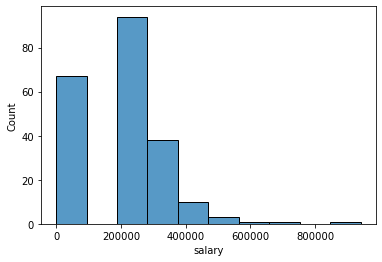

In [18]:
sns.histplot(df_processing['salary'])
print(len(df_processing['salary']))

This plot gives us some things to consider:
* We have one observation that is really out there, alongside two more observations that push the the right tail to be quite long
* We have many observations that are of zero value which are way off from the other observations
* This distribution doesn't appear to really be a normal distribution as even if we drop the extreme observations, it's still has a relatively skewed distribution

When we evaluated the data previously, we did identify outliers as captured by our 'salary_gt0_outliers' but there doesn't seem to be any reason to drop these observations since they don't seem to be data points that raise concerns about them being errors. We'll keep them for now and only consider dropping them if further investigation warrants it

In [19]:
#Let's see if doing a natural log transformation helps fix some of the issues of this feature
logHolder = np.array(df_processing['salary']) + 1
type(logHolder)

numpy.ndarray

215


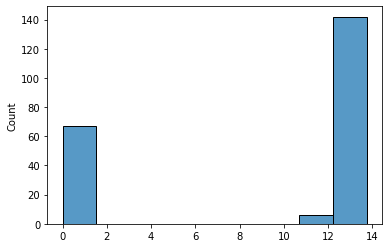

In [20]:
sns.histplot(np.log(logHolder))
print(len(logHolder))

The natural log transformation solves the magnitude problem quite well but still retains the the right tail issue so this probably wouldn't be an appropriate transformation for this feature. One last transformation we can consider would be a Power Transformation

In [21]:
#Import the relevant packages
from sklearn.preprocessing import PowerTransformer

In [22]:
#Instantiate the Power Transformer
powTrans = PowerTransformer()

powTrans.fit(df_processing[['salary']])

powHolder = powTrans.transform(df_processing[['salary']])

215


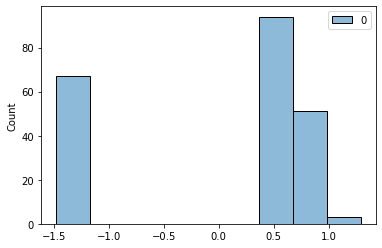

In [23]:
sns.histplot(powHolder)
print(len(logHolder))

Based on the transformations, it's pretty clear that due to the unique form of our target feature, it's going to be very difficult to actually put it in a form that will be normal. Therefore, we can assume that we will need to rely on the nonparametric models to work with this data when it comes to salary.

As such, we wil elect for now to not transform the salary information as we will most likely need to use models that are insensitive to the magnitude to account for it being a very non-normal distribution.

In [24]:
#Let's re-insert our 'salary' feature back into our data set
df_processing_dataset_MMScaled.insert(len(df_processing_dataset_MMScaled.columns)-1,'salary',df_processing['salary'])

In [25]:
df_processing_dataset_MMScaled.head(10)

,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation_finance,mba_p,employed,salary,salary_gt0_outliers
0,0.0,0.538240,0.0,0.889621,0.0,0.0,1.0,0.0,0.195122,0.0,0.0,1.0,0.0,0.104167,0.0,0.284483,1.0,270000.0,0.0
1,0.0,0.792414,1.0,0.680890,0.0,0.0,0.0,1.0,0.670244,0.0,0.0,1.0,1.0,0.760417,1.0,0.564843,1.0,200000.0,0.0
2,0.0,0.497011,1.0,0.510708,0.0,1.0,0.0,0.0,0.341463,0.0,1.0,0.0,0.0,0.520833,1.0,0.247001,1.0,250000.0,0.0
3,0.0,0.311482,1.0,0.247117,0.0,1.0,0.0,1.0,0.048780,0.0,0.0,1.0,0.0,0.333333,0.0,0.308096,0.0,0.0,0.0
4,0.0,0.925788,1.0,0.602965,0.0,1.0,1.0,0.0,0.568293,0.0,1.0,0.0,0.0,0.975000,1.0,0.160795,1.0,425000.0,1.0
5,0.0,0.290868,0.0,0.210873,0.0,0.0,0.0,1.0,0.420732,0.0,0.0,1.0,1.0,0.104167,1.0,0.013868,0.0,0.0,0.0
6,1.0,0.105339,0.0,0.200988,0.0,0.0,1.0,0.0,0.707317,0.0,1.0,0.0,0.0,0.505833,1.0,0.077961,0.0,0.0,0.0
7,0.0,0.847454,1.0,0.444811,0.0,1.0,0.0,1.0,0.390244,0.0,0.0,1.0,1.0,0.354167,1.0,0.409670,1.0,252000.0,0.0
8,0.0,0.661925,1.0,0.691928,0.0,1.0,1.0,0.0,0.536585,0.0,1.0,0.0,0.0,0.861250,1.0,0.377811,1.0,231000.0,0.0
9,0.0,0.352711,1.0,0.543657,0.0,1.0,1.0,0.0,0.268293,0.0,1.0,0.0,0.0,0.083333,1.0,0.037481,0.0,0.0,0.0


In [26]:
df_processing_dataset_MMScaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   female                  215 non-null    float64
 1   ssc_p                   215 non-null    float64
 2   ssc_Central             215 non-null    float64
 3   hsc_p                   215 non-null    float64
 4   hsc_p_outlier           215 non-null    float64
 5   hsc_Central             215 non-null    float64
 6   hsc_s_commerce          215 non-null    float64
 7   hsc_s_science           215 non-null    float64
 8   degree_p                215 non-null    float64
 9   degree_p_outlier        215 non-null    float64
 10  degree_t_comm_mgmt      215 non-null    float64
 11  degree_t_sci_tech       215 non-null    float64
 12  work_experience         215 non-null    float64
 13  etest_p                 215 non-null    float64
 14  specialisation_finance  215 non-null    fl

Based on everything we've seen, it would appear that our data should be ready to use for modeling purposes now! As such, let's save it and then we are done! This was an interesting exercise for me as dealing with salary was something I didn't think was going to be hard but it actually ended up requiring some serious thought! Cheers! Emre

In [27]:
# Let's save this data set
df_processing_dataset_MMScaled.to_csv('Modeling_Data_PREPARED.csv')